In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('data/ctrain.csv', header=0)
print(data.shape)
print(list(data.columns))

(68776, 17)
['new1', 'id', 'Sex', 'Age', 'high_BP', 'heart_condition_detected_2017', 'married', 'job_status', 'living_area', 'average_blood_sugar', 'BMI', 'smoker_status', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD', 'stroke_in_2018']


In [3]:
data

,new1,id,Sex,Age,high_BP,heart_condition_detected_2017,married,job_status,living_area,average_blood_sugar,BMI,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD,stroke_in_2018
0,0,16053,F,61,1,0,1,GOVERNMENT,REMOTE,71.67,36.6,non-smoker,NaN,NaN,NaN,NaN,0
1,1,1459,F,30,0,0,0,PRIVATE_SECTOR,REMOTE,107.95,30.4,quit,NaN,NaN,NaN,NaN,0
2,2,7678,F,51,1,0,1,GOVERNMENT,REMOTE,76.49,42.1,active_smoker,NaN,NaN,NaN,NaN,0
3,3,34943,M,54,0,0,1,GOVERNMENT,CITY,113.98,57.3,quit,NaN,NaN,NaN,NaN,0
4,4,17741,M,27,0,0,0,PRIVATE_SECTOR,CITY,70.60,26.7,active_smoker,NaN,NaN,NaN,NaN,0
5,5,26198,M,45,0,0,1,PRIVATE_SECTOR,REMOTE,109.00,31.0,non-smoker,NaN,NaN,NaN,NaN,0
6,6,7284,F,63,0,0,1,PRIVATE_SECTOR,CITY,100.85,37.5,non-smoker,NaN,NaN,NaN,NaN,0
7,7,10704,F,55,0,1,1,BUSINESS_OWNER,REMOTE,188.39,31.0,non-smoker,0.0,0.0,0.0,0.0,0
8,8,41988,M,37,0,0,0,PRIVATE_SECTOR,CITY,161.72,23.1,non-smoker,NaN,NaN,NaN,NaN,0
9,9,12578,M,49,0,0,1,PRIVATE_SECTOR,CITY,91.02,30.4,active_smoker,NaN,NaN,NaN,NaN,0


In [4]:
data['stroke_in_2018'].value_counts()

1    34556
0    34220
Name: stroke_in_2018, dtype: int64

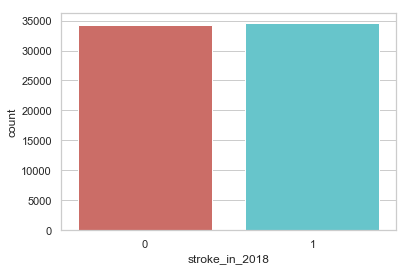

In [5]:
sns.countplot(x='stroke_in_2018',data=data, palette='hls')
plt.show()

In [6]:
data.groupby('stroke_in_2018').mean()

,new1,id,Age,high_BP,heart_condition_detected_2017,married,average_blood_sugar,BMI,TreatmentA,TreatmentB,TreatmentC,TreatmentD
stroke_in_2018,,,,,,,,,,,,
0,17432.609848,21720.226885,44.756458,0.090532,0.044039,0.637493,108.706959,30.910923,0.195753,0.297279,0.196417,0.193762
1,17587.188650,22409.075153,71.627301,0.253067,0.225460,0.894172,133.788021,32.032669,0.094595,0.168919,0.141892,0.493243


In [7]:
cols = ['Age', 'high_BP', 'heart_condition_detected_2017', 'BMI']
X = data[cols]
y = data['stroke_in_2018']

import statsmodels.api as sm
logit_model=sm.Logit(y.astype(int),X.astype(float))
result=logit_model.fit()
print(result.summary2())

# data.head(1)

Optimization terminated successfully.
         Current function value: 0.520729
         Iterations 6
                                Results: Logit
Model:                    Logit                Pseudo R-squared:     0.249     
Dependent Variable:       stroke_in_2018       AIC:                  71635.2942
Date:                     2019-07-20 20:43     BIC:                  71671.8486
No. Observations:         68776                Log-Likelihood:       -35814.   
Df Model:                 3                    LL-Null:              -47671.   
Df Residuals:             68772                LLR p-value:          0.0000    
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           6.0000                                               
-------------------------------------------------------------------------------
                               Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------------------------------------------------

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

cols = ['Age', 'high_BP', 'heart_condition_detected_2017', 'BMI']
X = data[cols]
y = data['stroke_in_2018']

X_train, X_test, y_train, y_test = train_test_split(X.astype(float), y.astype(int), test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7452 2722]
 [2051 8408]]


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76     10174
           1       0.76      0.80      0.78     10459

    accuracy                           0.77     20633
   macro avg       0.77      0.77      0.77     20633
weighted avg       0.77      0.77      0.77     20633



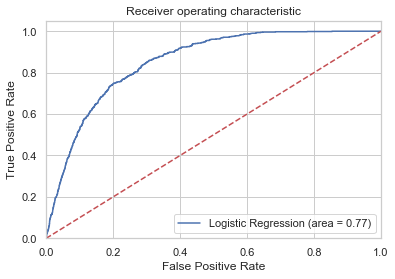

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [13]:
test = pd.read_csv('data/ctest.csv', header=0)
test

,id,sex,age,high_BP,heart_condition_detected_2017,married,average_blood_sugar,BMI,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD,job_status,living_status
0,33327,F,36,0,0,1,76.05,33.4,active_smoker,NaN,NaN,NaN,NaN,PRIVATE_SECTOR,REMOTE
1,839,F,40,0,0,1,73.77,30.1,non-smoker,NaN,NaN,NaN,NaN,GOVERNMENT,CITY
2,11127,M,59,0,0,1,62.95,30.8,non-smoker,NaN,NaN,NaN,NaN,BUSINESS_OWNER,REMOTE
3,20768,F,33,0,0,1,68.81,36.5,quit,NaN,NaN,NaN,NaN,PRIVATE_SECTOR,CITY
4,37774,F,22,0,0,0,122.89,30.8,active_smoker,NaN,NaN,NaN,NaN,PRIVATE_SECTOR,CITY
5,4283,M,60,0,1,1,116.97,30.7,non-smoker,0.0,1.0,0.0,1.0,BUSINESS_OWNER,CITY
6,13832,F,83,0,0,1,112.96,44.7,non-smoker,NaN,NaN,NaN,NaN,BUSINESS_OWNER,CITY
7,4579,M,47,0,1,0,99.22,36.7,non-smoker,0.0,1.0,0.0,0.0,GOVERNMENT,CITY
8,26781,F,82,0,0,1,226.94,28.9,non-smoker,NaN,NaN,NaN,NaN,PRIVATE_SECTOR,CITY
9,17196,F,49,0,0,1,78.88,28.0,non-smoker,NaN,NaN,NaN,NaN,PRIVATE_SECTOR,CITY


In [31]:
test = pd.read_csv('data/ctest.csv', header=0)
cols = ['age', 'high_BP', 'heart_condition_detected_2017', 'BMI']
testX = test[cols]
# test
results = np.array(logreg.predict(testX).tolist())
# print(results)

np.savetxt('pot.csv', results, fmt='%d')
# test.to_csv(r'submission.csv')